In [151]:
#All the library imports that we needed for this project are included here.
from keras import models, layers, optimizers,regularizers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
from keras.applications import VGG16, ResNet50, InceptionV3
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, shutil
import skimage.io
from PIL import Image

In [3]:
#Loading the train and test csv data files as dataframes.
train_dataset = pd.read_csv('./dataset/train.csv')
test_dataset = pd.read_csv('./dataset/test.csv')

print("Length of training data is:", train_dataset.shape[0])
print("Length of testing data is:", test_dataset.shape[0])

test_dataset["id_code"] = test_dataset["id_code"].apply(lambda x: x + ".png")

#debug purpose.
#print("\nSummary of first 10 rows of train data:")
#_dataset.head(10)

test_dataset

Length of training data is: 3662
Length of testing data is: 1928


,id_code
0,0005cfc8afb6.png
1,003f0afdcd15.png
2,006efc72b638.png
3,00836aaacf06.png
4,009245722fa4.png
...,...
1923,ff2fd94448de.png
1924,ff4c945d9b17.png
1925,ff64897ac0d8.png
1926,ffa73465b705.png


In [9]:
#Splitting the training dataset into training and validation dataset.
#Approximately 30% is held out for validation and remaining 70% is used for training the models.
validation_dataset =train_dataset.iloc[:1200,:]
print("Validation set size:" ,validation_dataset.shape[0])

train_dataset = train_dataset.iloc[1200:,:]
print("Training set size:" ,train_dataset.shape[0])

#debug purpose.
#print(validation_dataset)
#debug purpose.
#print(train_dataset)

Validation set size: 1200
Training set size: 2462


In [10]:
#Split the training data & validation data each into 5 respective classes using the diagnosis variable from the training data.
class_train = []
class_val = []

for i in range(5):
    class_train.append(train_dataset[train_dataset['diagnosis'] == i]['id_code'].tolist())
    class_val.append(validation_dataset[validation_dataset['diagnosis'] == i]['id_code'].tolist())

#Concatenate .png extension at the end of each id to use this as a filename.
class_train = [[file_id + '.png' for file_id in class_n] for class_n in class_train]
class_val = [[file_id + '.png' for file_id in class_n] for class_n in class_val]

for i,class_n in enumerate(class_train):
    print("Length of training data in class",i,":", len(class_n))

print("")

for i,class_n in enumerate(class_val):
    print("Length of validation data in class",i,":", len(class_n))

Length of training data in class 0 : 1249
Length of training data in class 1 : 244
Length of training data in class 2 : 641
Length of training data in class 3 : 126
Length of training data in class 4 : 202

Length of validation data in class 0 : 556
Length of validation data in class 1 : 126
Length of validation data in class 2 : 358
Length of validation data in class 3 : 67
Length of validation data in class 4 : 93


In [11]:
#Original path to images directory.
train_dataset_dir = './dataset/train_images/'
test_dataset_dir = './dataset/test_images/'

#New directory for later use.
new_dataset_dir = './new_dataset/'

train_dir = os.path.join(new_dataset_dir, 'train')
#Create new directories for the labelled training data we have.
for i in range(5):
    new_folder = os.path.join(train_dir, 'class' + str(i))
    os.makedirs(new_folder, exist_ok=True)

#Create a copy of our training images to the new directories.
for i in range(5):
    for file_id in class_train[i]:
        src = os.path.join(train_dataset_dir, file_id)
        dst = os.path.join(train_dir, 'class' +  str(i), file_id)
        shutil.copy(src, dst)

val_dir= os.path.join(new_dataset_dir, 'val')
#Create new directories for the labelled validation data we have.
for i in range(5):
    new_folder = os.path.join(val_dir, 'class' + str(i))
    os.makedirs(new_folder, exist_ok=True)

#Create a copy of our validation images to the new directories.
for i in range(5):
    for file_id in class_val[i]:
        src = os.path.join(train_dataset_dir, file_id)
        dst = os.path.join(val_dir, 'class' +  str(i), file_id)
        shutil.copy(src, dst)

Class: [0] Height: 1050 Width: 1050
Class: [1] Height: 1958 Width: 2588
Class: [2] Height: 1226 Width: 1844
Class: [3] Height: 1944 Width: 2896
Class: [4] Height: 1958 Width: 2588


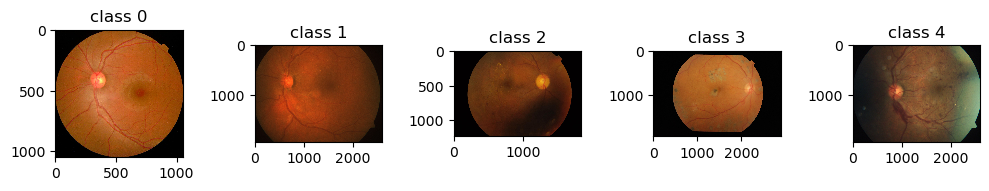

In [12]:
new_dataset_dir = './new_dataset/train/'
fig=plt.figure(figsize=(10,7))
rows=1
columns=5
#Displaying an example image for each class and their respective size.
for i in range(5):
    folder_path = os.path.join(new_dataset_dir, 'class' + str(i)+"/")
    Image_Id=os.listdir(folder_path)[i]
    Image_path=folder_path+Image_Id
    image = skimage.io.imread(Image_path)
    fig.add_subplot(rows,columns,i+1)
    skimage.io.imshow(image)
    plt.title("class "+ str(i))
    print("Class:",[i],"Height:", image.shape[0], "Width:", image.shape[1])

In [13]:
#Since the image sizes vary, we are resizing these so that all the images have uniform size before feeding those to the models.
print("Resizing images:")
train_folder = './new_dataset/train/'
val_folder = './new_dataset/val/'
test_folder = './dataset/test_images/'
w = 200
h = 200

#Resizing training data images.
print("Resizing all training data images")
for i in range(5):
    folder_path = os.path.join(train_folder, 'class' + str(i)+"/")
    for j in os.listdir(folder_path):
        file = f"{folder_path}\\{j}"
        im = Image.open(file)
        im = im.resize((w, h), Image.LANCZOS)
        im.save(file)
print("Done resizing all training data images")

#Resizing validation data images.
print("Resizing all validation data images")
for i in range(5):
    folder_path = os.path.join(val_folder, 'class' + str(i)+"/")
    for j in os.listdir(folder_path):
        file = f"{folder_path}\\{j}"
        im = Image.open(file)
        im = im.resize((w, h), Image.LANCZOS)
        im.save(file)
print("Done resizing all validation data images")

#Resizing test data images.
print("Resizing all testing data images")
for j in os.listdir(test_folder):
    file = f"{test_folder}\\{j}"
    im = Image.open(file)
    im = im.resize((w, h), Image.LANCZOS)
    im.save(file)
print("Done resizing all testing data images")

Resizing images:
Resizing all training data images


C:\Users\giris\AppData\Local\Temp\ipykernel_1396\455601926.py:17: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im = im.resize((w, h), Image.LANCZOS)


Done resizing all training data images
Resizing all validation data images


C:\Users\giris\AppData\Local\Temp\ipykernel_1396\455601926.py:30: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im = im.resize((w, h), Image.LANCZOS)


Done resizing all validation data images
Resizing all testing data images


C:\Users\giris\AppData\Local\Temp\ipykernel_1396\455601926.py:40: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im = im.resize((w, h), Image.LANCZOS)


Done resizing all testing data images


Class: [0] Height: 200 Width: 200
Class: [1] Height: 200 Width: 200
Class: [2] Height: 200 Width: 200
Class: [3] Height: 200 Width: 200
Class: [4] Height: 200 Width: 200


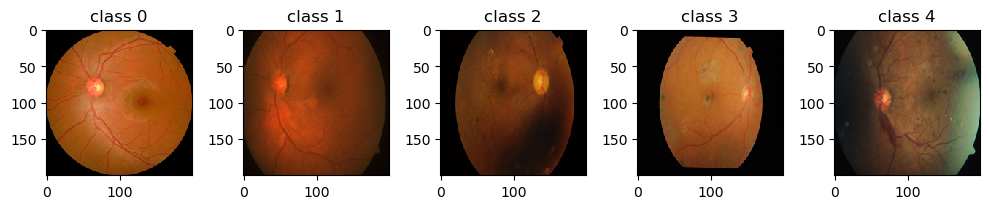

In [14]:
new_dataset_dir = './new_dataset/train/'
fig=plt.figure(figsize=(10,7))
rows=1
columns=5
#Displaying the same examples after resizing. 
for i in range(5):
    folder_path = os.path.join(new_dataset_dir, 'class' + str(i)+"/")
    Image_Id=os.listdir(folder_path)[i]
    Image_path=folder_path+Image_Id
    image = skimage.io.imread(Image_path)
    fig.add_subplot(rows,columns,i+1)
    skimage.io.imshow(image)
    plt.title("class "+ str(i))
    print("Class:",[i],"Height:", image.shape[0], "Width:", image.shape[1])

In [15]:
#Image Augmentation.
datatype = ['train','val']
class_aug = [1,3,4]

for data in datatype:
    for i in class_aug:
        image_dir = './new_dataset/' + str(data) + '/class' + str(i)

        #Iterating through all the images in the directory to generate augmented images.
        for filename in os.listdir(image_dir):
            img = load_img(os.path.join(image_dir, filename))
            img_90 = img.rotate(90)
            img_90.save(os.path.join(image_dir, 'aug_90_' + filename))
            
            img_180 = img.rotate(180)
            img_180.save(os.path.join(image_dir, 'aug_180_' + filename))
            
            img_270 = img.rotate(270)
            img_270.save(os.path.join(image_dir, 'aug_270_' + filename))

In [147]:
#preprocess data using ImageDataGenerator

#with data augmentation on training data:

train_datagen_aug = ImageDataGenerator(
    rescale=1./255,                               
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')                                 

#without data augmentation:

#Normalize the pixels in range [0,255] to range [0,1] using rescale = 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [164]:
train_dir = './new_dataset/train/'
val_dir = './new_dataset/val/'
test_dir = './dataset/test_images/'

#Train generator and validation generator will be used as parameters when fitting the model using model.fit
#Use target_size = (128,128) to increase the resolution of all the images by increasing the size to help mitigate overfitting
train_generator_aug = train_datagen_aug.flow_from_directory(
    train_dir,
    target_size=(128,128),
    batch_size=50,
    class_mode='categorical')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128,128),
    batch_size=50,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(128,128),
    batch_size=50,
    class_mode='categorical')

#Compute batch/step size:
step_size_train_aug = train_generator_aug.n // train_generator_aug.batch_size
step_size_train = train_generator.n // train_generator.batch_size
step_size_valid = validation_generator.n // validation_generator.batch_size

Found 4178 images belonging to 5 classes.
Found 4178 images belonging to 5 classes.
Found 2058 images belonging to 5 classes.


In [123]:
# ------------------ The following 4 models are without data augmentation -------------------------#

#############Custom CNN Model#######################

#Build model with convolution layers, pooling, batch normalization, and various regularization techniques

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', input_shape=(128,128,3)))
model.add(layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal'))
model.add(layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal'))
model.add(layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(5, activation='softmax'))
print(model.summary())




Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_243 (Conv2D)         (None, 126, 126, 32)      896       
                                                                 
 conv2d_244 (Conv2D)         (None, 124, 124, 32)      9248      
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_237 (Ba  (None, 62, 62, 32)       128       
 tchNormalization)                                               
                                                                 
 dropout_35 (Dropout)        (None, 62, 62, 32)        0         
                                                                 
 conv2d_245 (Conv2D)         (None, 60, 60, 64)      

In [124]:
#Custom function for f1_score metric: taken from old Keras source code, sourced from - 
def f1(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1 = 2*(precision*recall) / (precision + recall + K.epsilon())
    return f1

#Compile the model using optimizer and loss function
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=[tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(),
                        f1,
                        tf.keras.metrics.AUC(),
                        'acc'])

In [125]:
#fit model
history = model.fit(
    train_generator,
    steps_per_epoch=step_size_train,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=step_size_valid)

Epoch 1/20
83/83 [==============================] - 14s 143ms/step - loss: 4.7522 - precision_27: 0.6732 - recall_27: 0.3479 - f1: 0.4560 - auc_27: 0.8101 - acc: 0.5179 - val_loss: 4.4632 - val_precision_27: 0.0000e+00 - val_recall_27: 0.0000e+00 - val_f1: 0.0000e+00 - val_auc_27: 0.4584 - val_acc: 0.1507
Epoch 2/20
83/83 [==============================] - 11s 138ms/step - loss: 2.8404 - precision_27: 0.7469 - recall_27: 0.4232 - f1: 0.5381 - auc_27: 0.8739 - acc: 0.5935 - val_loss: 3.0445 - val_precision_27: 0.0000e+00 - val_recall_27: 0.0000e+00 - val_f1: 0.0000e+00 - val_auc_27: 0.4859 - val_acc: 0.1976
Epoch 3/20
83/83 [==============================] - 11s 135ms/step - loss: 1.9104 - precision_27: 0.7562 - recall_27: 0.4419 - f1: 0.5552 - auc_27: 0.8802 - acc: 0.6056 - val_loss: 2.4259 - val_precision_27: 0.0000e+00 - val_recall_27: 0.0000e+00 - val_f1: 0.0000e+00 - val_auc_27: 0.5624 - val_acc: 0.2751
Epoch 4/20
83/83 [==============================] - 11s 133ms/step - loss: 1.46

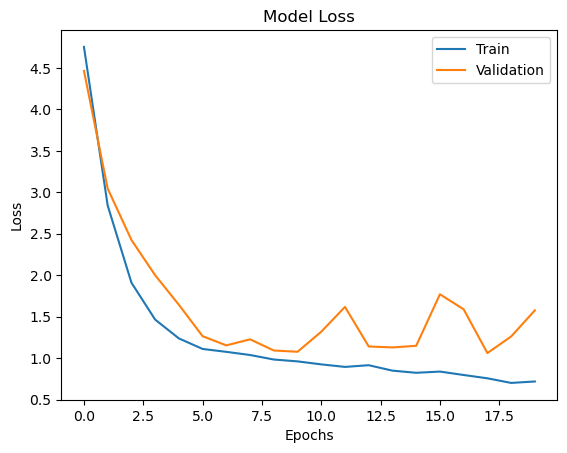

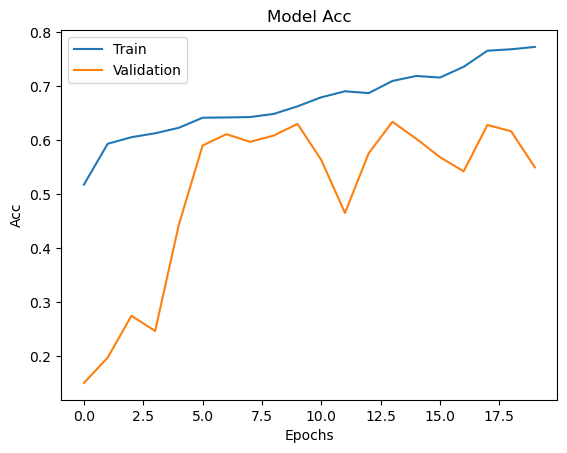

In [126]:
#Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='best')
plt.show()

#Plot training and validation accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Acc')
plt.ylabel('Acc')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='best')
plt.show()

In [114]:
#############VGG16 Model#######################
#Instantiating the VGG16 conv base
conv_base = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(128, 128, 3))


#freeze the loaded model so as to avoid destroying any of the information they contain during future training rounds
conv_base.trainable = False

#add the loaded model as a layer and added additional layers
conv_base_model = models.Sequential()
conv_base_model.add(conv_base)
conv_base_model.add(layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal'))
conv_base_model.add(layers.MaxPooling2D((2,2)))
conv_base_model.add(layers.BatchNormalization())
conv_base_model.add(layers.Flatten())
conv_base_model.add(layers.Dense(32, activation='relu'))          
conv_base_model.add(layers.Dense(5, activation='softmax'))
print(conv_base_model.summary())



Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 conv2d_236 (Conv2D)         (None, 2, 2, 16)          73744     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 1, 1, 16)         0         
 g2D)                                                            
                                                                 
 batch_normalization_233 (Ba  (None, 1, 1, 16)         64        
 tchNormalization)                                               
                                                                 
 flatten_23 (Flatten)        (None, 16)                0         
                                                                 
 dense_69 (Dense)            (None, 32)              

In [115]:
#Compile the model using optimizer and loss function
conv_base_model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=[tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(),
                        f1,
                        tf.keras.metrics.AUC(),
                        'acc'])


In [116]:
vgg_history = conv_base_model.fit(
    train_generator,
    steps_per_epoch=step_size_train,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=step_size_valid)

Epoch 1/10
83/83 [==============================] - 13s 138ms/step - loss: 1.0747 - precision_25: 0.8357 - recall_25: 0.3118 - f1: 0.4357 - auc_25: 0.8609 - acc: 0.5865 - val_loss: 1.8519 - val_precision_25: 0.2103 - val_recall_25: 0.1727 - val_f1: 0.1893 - val_auc_25: 0.6506 - val_acc: 0.1839
Epoch 2/10
83/83 [==============================] - 11s 130ms/step - loss: 0.8205 - precision_25: 0.8002 - recall_25: 0.5240 - f1: 0.6314 - auc_25: 0.9179 - acc: 0.6851 - val_loss: 1.1723 - val_precision_25: 0.4964 - val_recall_25: 0.3678 - val_f1: 0.4217 - val_auc_25: 0.8276 - val_acc: 0.4371
Epoch 3/10
83/83 [==============================] - 11s 131ms/step - loss: 0.7293 - precision_25: 0.8001 - recall_25: 0.6049 - f1: 0.6884 - auc_25: 0.9338 - acc: 0.7209 - val_loss: 0.8831 - val_precision_25: 0.7227 - val_recall_25: 0.5200 - val_f1: 0.6036 - val_auc_25: 0.8996 - val_acc: 0.6298
Epoch 4/10
83/83 [==============================] - 11s 131ms/step - loss: 0.6890 - precision_25: 0.8003 - recall_2

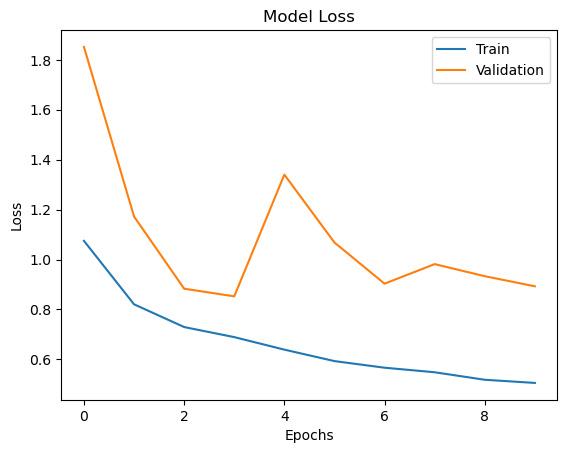

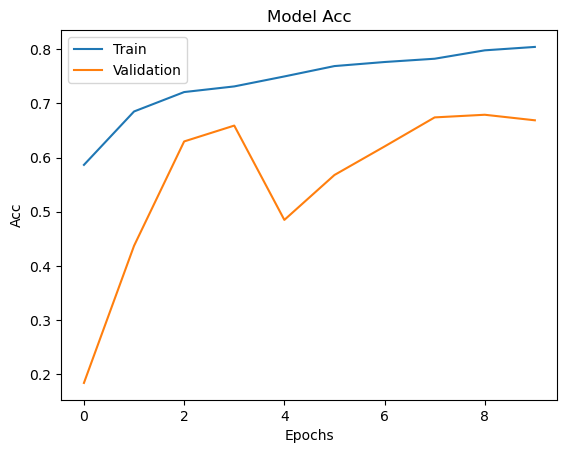

In [117]:
#Plot training and validation loss
plt.plot(vgg_history.history['loss'])
plt.plot(vgg_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='best')
plt.show()

#Plot training and validation accuracy
plt.plot(vgg_history.history['acc'])
plt.plot(vgg_history.history['val_acc'])
plt.title('Model Acc')
plt.ylabel('Acc')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='best')
plt.show()

In [85]:
#############ResNet50 Model#######################
#Instantiating the Resnet50 conv base
resnet_base = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(128, 128, 3))


#freeze the loaded model so as to avoid destroying any of the information they contain during future training rounds
resnet_base.trainable = False

#add the loaded model as a layer and added additional layers
resnet_base_model = models.Sequential()
resnet_base_model.add(resnet_base)
resnet_base_model.add(layers.BatchNormalization())
resnet_base_model.add(layers.Flatten())
resnet_base_model.add(layers.BatchNormalization())
resnet_base_model.add(layers.Dense(64, activation='relu',kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(l=0.01))) 
resnet_base_model.add(layers.BatchNormalization())
resnet_base_model.add(layers.Dense(32, activation='relu',kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(l=0.01))) 
resnet_base_model.add(layers.Dropout(0.2))
resnet_base_model.add(layers.Dense(5, activation='softmax'))
print(resnet_base_model.summary())

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 batch_normalization_128 (Ba  (None, 4, 4, 2048)       8192      
 tchNormalization)                                               
                                                                 
 flatten_16 (Flatten)        (None, 32768)             0         
                                                                 
 batch_normalization_129 (Ba  (None, 32768)            131072    
 tchNormalization)                                               
                                                                 
 dense_53 (Dense)            (None, 64)                2097216   
                                                                 
 batch_normalization_130 (Ba  (None, 64)             

In [86]:
#Compile the model using optimizer and loss function
resnet_base_model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=[tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(),
                        f1,
                        tf.keras.metrics.AUC(),
                        'acc'])

In [87]:
resnet_history = resnet_base_model.fit(
    train_generator,
    steps_per_epoch=step_size_train,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=step_size_valid)

Epoch 1/20
83/83 [==============================] - 18s 162ms/step - loss: 1.8768 - precision_18: 0.6969 - recall_18: 0.3922 - f1: 0.4990 - auc_18: 0.8323 - acc: 0.5552 - val_loss: 2.1248 - val_precision_18: 1.0000 - val_recall_18: 0.0268 - val_f1: 0.0510 - val_auc_18: 0.6479 - val_acc: 0.2244
Epoch 2/20
83/83 [==============================] - 12s 139ms/step - loss: 1.4655 - precision_18: 0.7616 - recall_18: 0.4792 - f1: 0.5863 - auc_18: 0.8871 - acc: 0.6281 - val_loss: 2.0450 - val_precision_18: 0.5694 - val_recall_18: 0.0400 - val_f1: 0.0734 - val_auc_18: 0.6197 - val_acc: 0.2429
Epoch 3/20
83/83 [==============================] - 13s 154ms/step - loss: 1.2964 - precision_18: 0.7710 - recall_18: 0.5170 - f1: 0.6182 - auc_18: 0.9027 - acc: 0.6567 - val_loss: 1.9115 - val_precision_18: 0.4957 - val_recall_18: 0.0844 - val_f1: 0.1424 - val_auc_18: 0.6577 - val_acc: 0.3029
Epoch 4/20
83/83 [==============================] - 11s 133ms/step - loss: 1.2117 - precision_18: 0.7568 - recall_1

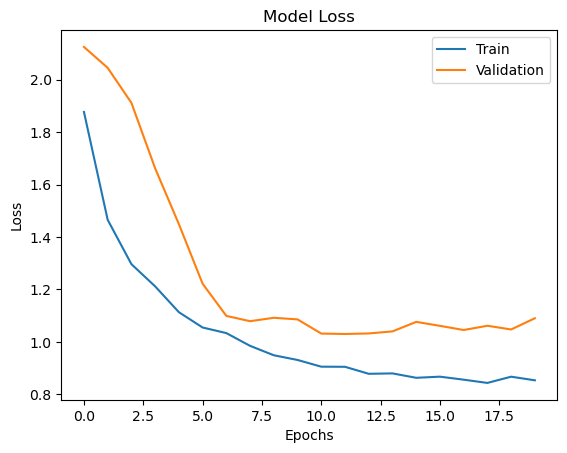

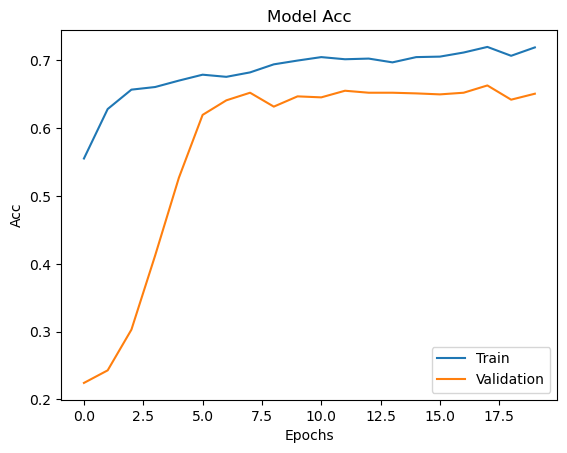

In [88]:
#Plot training and validation loss
plt.plot(resnet_history.history['loss'])
plt.plot(resnet_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='best')
plt.show()

#Plot training and validation accuracy
plt.plot(resnet_history.history['acc'])
plt.plot(resnet_history.history['val_acc'])
plt.title('Model Acc')
plt.ylabel('Acc')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='best')
plt.show()

In [97]:
#############InceptionV3 Model#######################
#Instantiating the InceptionV3 conv base
inception_base = InceptionV3(
    weights='imagenet',
    include_top=False,
    input_shape=(128, 128, 3))


#freeze the loaded model so as to avoid destroying any of the information they contain during future training rounds
inception_base.trainable = False

#add the loaded model as a layer and added additional layers
inception_base_model = models.Sequential()
inception_base_model.add(inception_base)
inception_base_model.add(layers.BatchNormalization())
inception_base_model.add(layers.GlobalAveragePooling2D())
inception_base_model.add(layers.Dropout(0.4))
inception_base_model.add(layers.Flatten())
inception_base_model.add(layers.BatchNormalization())
inception_base_model.add(layers.Dense(64, activation='relu',kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(l=0.01))) 
inception_base_model.add(layers.BatchNormalization())
inception_base_model.add(layers.Dense(32, activation='relu',kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(l=0.01))) 
inception_base_model.add(layers.Dropout(0.2))
inception_base_model.add(layers.Dense(5, activation='softmax'))
print(inception_base_model.summary())
                      
                      

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2, 2, 2048)        21802784  
                                                                 
 batch_normalization_227 (Ba  (None, 2, 2, 2048)       8192      
 tchNormalization)                                               
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_29 (Dropout)        (None, 2048)              0         
                                                                 
 flatten_19 (Flatten)        (None, 2048)              0         
                                                                 
 batch_normalization_228 (Ba  (None, 2048)           

In [98]:
#Compile the model using optimizer and loss function
inception_base_model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=[tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(),
                        f1,
                        tf.keras.metrics.AUC(),
                        'acc'])

In [99]:
inception_history2 = inception_base_model.fit(
    train_generator,
    steps_per_epoch=step_size_train,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=step_size_valid)

Epoch 1/20
83/83 [==============================] - 18s 156ms/step - loss: 3.0767 - precision_21: 0.6059 - recall_21: 0.3527 - f1: 0.4444 - auc_21: 0.7965 - acc: 0.4983 - val_loss: 2.6933 - val_precision_21: 0.7150 - val_recall_21: 0.4210 - val_f1: 0.5285 - val_auc_21: 0.8490 - val_acc: 0.5620
Epoch 2/20
83/83 [==============================] - 12s 146ms/step - loss: 2.3874 - precision_21: 0.7467 - recall_21: 0.4591 - f1: 0.5669 - auc_21: 0.8841 - acc: 0.6216 - val_loss: 2.2071 - val_precision_21: 0.7655 - val_recall_21: 0.4444 - val_f1: 0.5597 - val_auc_21: 0.8839 - val_acc: 0.6229
Epoch 3/20
83/83 [==============================] - 11s 133ms/step - loss: 1.9627 - precision_21: 0.7803 - recall_21: 0.5179 - f1: 0.6209 - auc_21: 0.9084 - acc: 0.6621 - val_loss: 1.8851 - val_precision_21: 0.7713 - val_recall_21: 0.4771 - val_f1: 0.5875 - val_auc_21: 0.8932 - val_acc: 0.6356
Epoch 4/20
83/83 [==============================] - 11s 137ms/step - loss: 1.6589 - precision_21: 0.7888 - recall_2

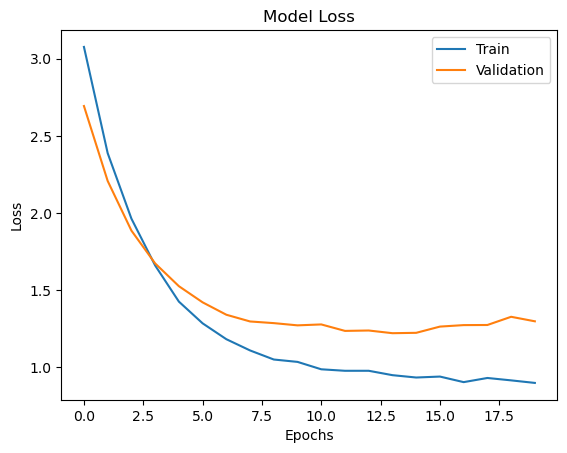

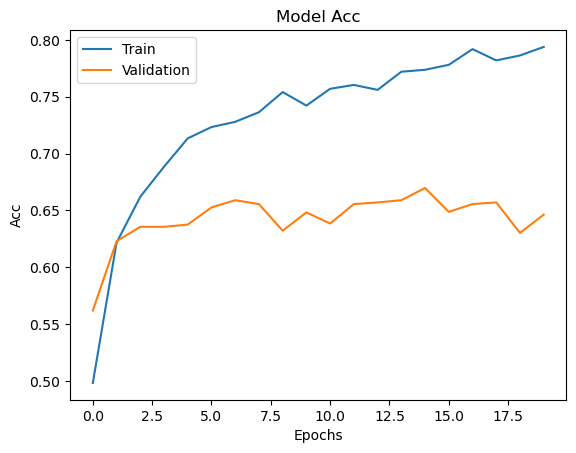

In [100]:
#Plot training and validation loss
plt.plot(inception_history2.history['loss'])
plt.plot(inception_history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='best')
plt.show()

#Plot training and validation accuracy
plt.plot(inception_history2.history['acc'])
plt.plot(inception_history2.history['val_acc'])
plt.title('Model Acc')
plt.ylabel('Acc')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='best')
plt.show()

In [37]:
# ------------------ The following 4 models are with data augmentation -------------------------#

#############Custom CNN Model#######################

#Build model with convolution layers, pooling, batch normalization, and various regularization techniques

model_aug = models.Sequential()
model_aug.add(layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', input_shape=(128,128,3)))
model_aug.add(layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(l=0.01)))
model_aug.add(layers.MaxPooling2D((2,2)))
model_aug.add(layers.BatchNormalization())
model_aug.add(layers.Dropout(0.4))
model_aug.add(layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal'))
model_aug.add(layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(l=0.01)))
model_aug.add(layers.MaxPooling2D((2,2)))
model_aug.add(layers.BatchNormalization())
model_aug.add(layers.Dropout(0.4))
model_aug.add(layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal'))
model_aug.add(layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(l=0.01)))
model_aug.add(layers.MaxPooling2D((2,2)))
model_aug.add(layers.BatchNormalization())
model_aug.add(layers.Dropout(0.4))
model_aug.add(layers.Flatten())
model_aug.add(layers.Dense(256, activation='relu'))
model_aug.add(layers.Dense(128, activation='relu'))
model_aug.add(layers.Dense(64, activation='relu'))
model_aug.add(layers.Dense(32, activation='relu'))
model_aug.add(layers.Dropout(0.2))
model_aug.add(layers.Dense(5, activation='softmax'))
print(model_aug.summary())




Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_108 (Conv2D)         (None, 126, 126, 32)      896       
                                                                 
 conv2d_109 (Conv2D)         (None, 124, 124, 32)      9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_111 (Ba  (None, 62, 62, 32)       128       
 tchNormalization)                                               
                                                                 
 dropout_12 (Dropout)        (None, 62, 62, 32)        0         
                                                                 
 conv2d_110 (Conv2D)         (None, 60, 60, 64)       

In [38]:
#Compile the model using optimizer and loss function
model_aug.compile(
    optimizer=optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=[tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(),
                        f1,
                        tf.keras.metrics.AUC(),
                        'acc'])

In [39]:
#fit model using data augmentation
step_size_train=train_generator_aug.n//train_generator_aug.batch_size
step_size_valid=validation_generator.n//validation_generator.batch_size


history_aug = model_aug.fit(
    train_generator_aug,
    steps_per_epoch=step_size_train,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=step_size_valid)

Epoch 1/20
83/83 [==============================] - 25s 279ms/step - loss: 5.2285 - precision_8: 0.5041 - recall_8: 0.1352 - f1: 0.2116 - auc_8: 0.6671 - acc: 0.3583 - val_loss: 4.4924 - val_precision_8: 0.0000e+00 - val_recall_8: 0.0000e+00 - val_f1: 0.0000e+00 - val_auc_8: 0.4931 - val_acc: 0.2439
Epoch 2/20
83/83 [==============================] - 23s 280ms/step - loss: 3.4765 - precision_8: 0.6753 - recall_8: 0.1894 - f1: 0.2942 - auc_8: 0.7396 - acc: 0.4198 - val_loss: 3.6029 - val_precision_8: 0.2803 - val_recall_8: 0.1659 - val_f1: 0.2079 - val_auc_8: 0.4896 - val_acc: 0.2444
Epoch 3/20
83/83 [==============================] - 23s 278ms/step - loss: 2.3784 - precision_8: 0.7430 - recall_8: 0.2507 - f1: 0.3725 - auc_8: 0.7960 - acc: 0.4862 - val_loss: 3.1206 - val_precision_8: 0.4594 - val_recall_8: 0.1132 - val_f1: 0.1802 - val_auc_8: 0.5362 - val_acc: 0.2449
Epoch 4/20
83/83 [==============================] - 24s 287ms/step - loss: 1.8078 - precision_8: 0.8007 - recall_8: 0.268

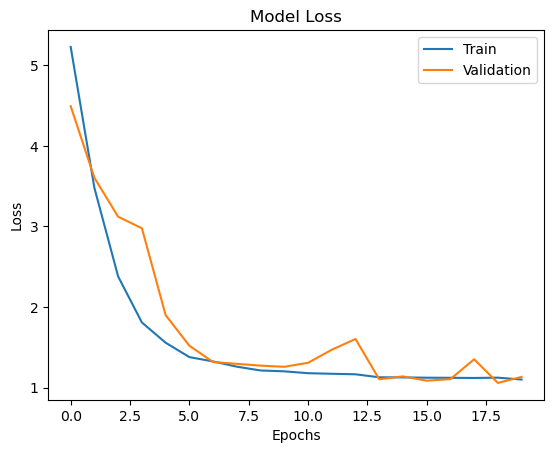

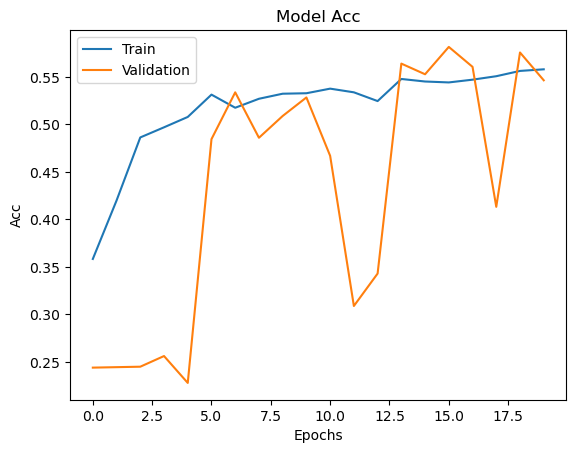

In [40]:
#Plot training and validation loss
plt.plot(history_aug.history['loss'])
plt.plot(history_aug.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='best')
plt.show()

#Plot training and validation accuracy
plt.plot(history_aug.history['acc'])
plt.plot(history_aug.history['val_acc'])
plt.title('Model Acc')
plt.ylabel('Acc')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='best')
plt.show()

In [41]:
#############VGG16 Model with data augmentation#######################
#Instantiating the VGG16 conv base
conv_base_aug = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(128, 128, 3))


#freeze the loaded model so as to avoid destroying any of the information they contain during future training rounds
conv_base_aug.trainable = False

#add the loaded model as a layer and added additional layers
conv_base_aug_model = models.Sequential()
conv_base_aug_model.add(conv_base_aug)
conv_base_aug_model.add(layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal'))
conv_base_aug_model.add(layers.MaxPooling2D((2,2)))
conv_base_aug_model.add(layers.BatchNormalization())
conv_base_aug_model.add(layers.Flatten())
conv_base_aug_model.add(layers.Dense(32, activation='relu'))          
conv_base_aug_model.add(layers.Dense(5, activation='softmax'))
print(conv_base_aug_model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 conv2d_114 (Conv2D)         (None, 2, 2, 16)          73744     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 1, 1, 16)         0         
 g2D)                                                            
                                                                 
 batch_normalization_114 (Ba  (None, 1, 1, 16)         64        
 tchNormalization)                                               
                                                                 
 flatten_8 (Flatten)         (None, 16)                0         
                                                                 
 dense_28 (Dense)            (None, 32)               

In [42]:
#Compile the model using optimizer and loss function
conv_base_aug_model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=[tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(),
                        f1,
                        tf.keras.metrics.AUC(),
                        'acc'])

In [43]:
vgg_history_aug = conv_base_aug_model.fit(
    train_generator_aug,
    steps_per_epoch=step_size_train,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=step_size_valid)

Epoch 1/20
83/83 [==============================] - 24s 280ms/step - loss: 1.2234 - precision_9: 0.8586 - recall_9: 0.2207 - f1: 0.3463 - auc_9: 0.7970 - acc: 0.4738 - val_loss: 1.1613 - val_precision_9: 0.8130 - val_recall_9: 0.3054 - val_f1: 0.4404 - val_auc_9: 0.8122 - val_acc: 0.5024
Epoch 2/20
83/83 [==============================] - 23s 274ms/step - loss: 1.0454 - precision_9: 0.8300 - recall_9: 0.2922 - f1: 0.4301 - auc_9: 0.8586 - acc: 0.5581 - val_loss: 1.1268 - val_precision_9: 0.8498 - val_recall_9: 0.2429 - val_f1: 0.3754 - val_auc_9: 0.8303 - val_acc: 0.5185
Epoch 3/20
83/83 [==============================] - 24s 286ms/step - loss: 0.9819 - precision_9: 0.7931 - recall_9: 0.3658 - f1: 0.4991 - auc_9: 0.8754 - acc: 0.5962 - val_loss: 1.1793 - val_precision_9: 0.6963 - val_recall_9: 0.3366 - val_f1: 0.4514 - val_auc_9: 0.8168 - val_acc: 0.5141
Epoch 4/20
83/83 [==============================] - 24s 293ms/step - loss: 0.9423 - precision_9: 0.7680 - recall_9: 0.4050 - f1: 0.52

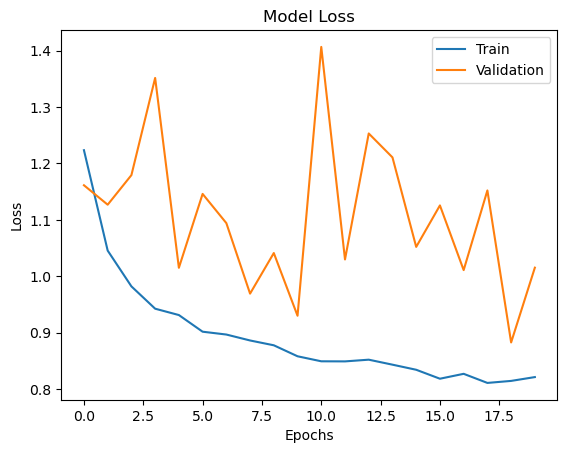

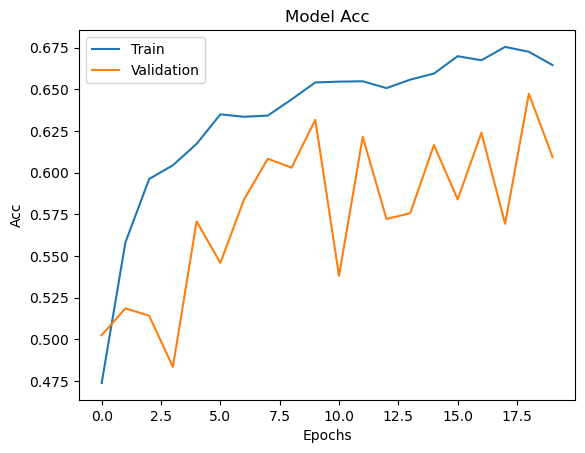

In [44]:
#Plot training and validation loss
plt.plot(vgg_history_aug.history['loss'])
plt.plot(vgg_history_aug.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='best')
plt.show()

#Plot training and validation accuracy
plt.plot(vgg_history_aug.history['acc'])
plt.plot(vgg_history_aug.history['val_acc'])
plt.title('Model Acc')
plt.ylabel('Acc')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='best')
plt.show()

In [29]:
#############ResNet50 Model with data augmentation#######################
#Instantiating the Resnet50 conv base
resnet_aug_base = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(128, 128, 3))


#freeze the loaded model so as to avoid destroying any of the information they contain during future training rounds
resnet_aug_base.trainable = False

#add the loaded model as a layer and added additional layers
resnet_aug_base_model = models.Sequential()
resnet_aug_base_model.add(resnet_aug_base)
resnet_aug_base_model.add(layers.BatchNormalization())
resnet_aug_base_model.add(layers.Flatten())
resnet_aug_base_model.add(layers.BatchNormalization())
resnet_aug_base_model.add(layers.Dense(64, activation='relu',kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(l=0.01))) 
resnet_aug_base_model.add(layers.BatchNormalization())
resnet_aug_base_model.add(layers.Dense(32, activation='relu',kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(l=0.01))) 
resnet_aug_base_model.add(layers.Dropout(0.2))
resnet_aug_base_model.add(layers.Dense(5, activation='softmax'))
print(resnet_aug_base_model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 batch_normalization_11 (Bat  (None, 4, 4, 2048)       8192      
 chNormalization)                                                
                                                                 
 flatten_5 (Flatten)         (None, 32768)             0         
                                                                 
 batch_normalization_12 (Bat  (None, 32768)            131072    
 chNormalization)                                                
                                                                 
 dense_17 (Dense)            (None, 64)                2097216   
                                                                 
 batch_normalization_13 (Bat  (None, 64)              

In [30]:
#Compile the model using optimizer and loss function
resnet_aug_base_model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=[tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(),
                        f1,
                        tf.keras.metrics.AUC(),
                        'acc'])

In [31]:
resnet_history_aug = resnet_aug_base_model.fit(
    train_generator_aug,
    steps_per_epoch=step_size_train,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=step_size_valid)

Epoch 1/20
83/83 [==============================] - 33s 317ms/step - loss: 2.2008 - precision_6: 0.5285 - recall_6: 0.1931 - f1: 0.2822 - auc_6: 0.7108 - acc: 0.3891 - val_loss: 2.5171 - val_precision_6: 0.8542 - val_recall_6: 0.1800 - val_f1: 0.2949 - val_auc_6: 0.5634 - val_acc: 0.2849
Epoch 2/20
83/83 [==============================] - 24s 287ms/step - loss: 1.8363 - precision_6: 0.6706 - recall_6: 0.2505 - f1: 0.3633 - auc_6: 0.7731 - acc: 0.4591 - val_loss: 1.8429 - val_precision_6: 0.8363 - val_recall_6: 0.2093 - val_f1: 0.3314 - val_auc_6: 0.7358 - val_acc: 0.3600
Epoch 3/20
83/83 [==============================] - 27s 320ms/step - loss: 1.6892 - precision_6: 0.6897 - recall_6: 0.2541 - f1: 0.3690 - auc_6: 0.7916 - acc: 0.4845 - val_loss: 1.6881 - val_precision_6: 0.8303 - val_recall_6: 0.2029 - val_f1: 0.3232 - val_auc_6: 0.7726 - val_acc: 0.4263
Epoch 4/20
83/83 [==============================] - 26s 311ms/step - loss: 1.5740 - precision_6: 0.7026 - recall_6: 0.2747 - f1: 0.39

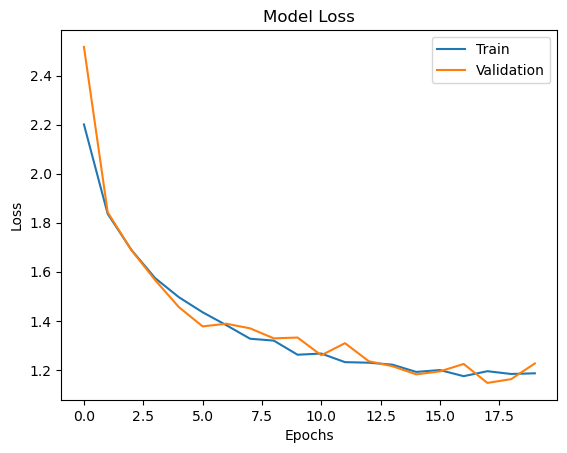

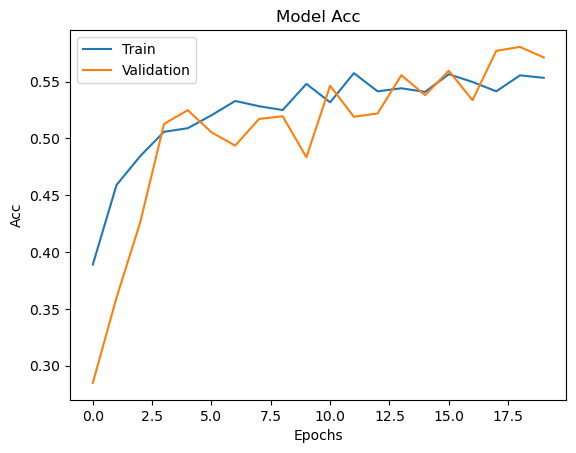

In [32]:
#Plot training and validation loss
plt.plot(resnet_history_aug.history['loss'])
plt.plot(resnet_history_aug.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='best')
plt.show()

#Plot training and validation accuracy
plt.plot(resnet_history_aug.history['acc'])
plt.plot(resnet_history_aug.history['val_acc'])
plt.title('Model Acc')
plt.ylabel('Acc')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='best')
plt.show()

In [33]:
#############InceptionV3 Model with data augmentation#######################
#Instantiating the InceptionV3 conv base
inception_aug_base = InceptionV3(
    weights='imagenet',
    include_top=False,
    input_shape=(128, 128, 3))


#freeze the loaded model so as to avoid destroying any of the information they contain during future training rounds
inception_aug_base.trainable = False

#add the loaded model as a layer and added additional layers
inception_aug_base_model = models.Sequential()
inception_aug_base_model.add(inception_aug_base)
inception_aug_base_model.add(layers.BatchNormalization())
inception_aug_base_model.add(layers.GlobalAveragePooling2D())
inception_aug_base_model.add(layers.Dropout(0.4))
inception_aug_base_model.add(layers.Flatten())
inception_aug_base_model.add(layers.BatchNormalization())
inception_aug_base_model.add(layers.Dense(64, activation='relu',kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(l=0.01))) 
inception_aug_base_model.add(layers.BatchNormalization())
inception_aug_base_model.add(layers.Dense(32, activation='relu',kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(l=0.01))) 
inception_aug_base_model.add(layers.Dropout(0.2))
inception_aug_base_model.add(layers.Dense(5, activation='softmax'))
print(inception_aug_base_model.summary())    

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2, 2, 2048)        21802784  
                                                                 
 batch_normalization_108 (Ba  (None, 2, 2, 2048)       8192      
 tchNormalization)                                               
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout_10 (Dropout)        (None, 2048)              0         
                                                                 
 flatten_6 (Flatten)         (None, 2048)              0         
                                                                 
 batch_normalization_109 (Ba  (None, 2048)            

In [34]:
#Compile the model using optimizer and loss function
inception_aug_base_model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=[tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(),
                        f1,
                        tf.keras.metrics.AUC(),
                        'acc'])

In [35]:
inception_history_aug = inception_aug_base_model.fit(
    train_generator_aug,
    steps_per_epoch=step_size_train,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=step_size_valid)

Epoch 1/20
83/83 [==============================] - 32s 316ms/step - loss: 3.2835 - precision_7: 0.5399 - recall_7: 0.2803 - f1: 0.3677 - auc_7: 0.7326 - acc: 0.4179 - val_loss: 3.0837 - val_precision_7: 0.5543 - val_recall_7: 0.3210 - val_f1: 0.4052 - val_auc_7: 0.7590 - val_acc: 0.4361
Epoch 2/20
83/83 [==============================] - 24s 287ms/step - loss: 2.6568 - precision_7: 0.6883 - recall_7: 0.3413 - f1: 0.4549 - auc_7: 0.8183 - acc: 0.5170 - val_loss: 2.4714 - val_precision_7: 0.6868 - val_recall_7: 0.3434 - val_f1: 0.4561 - val_auc_7: 0.8230 - val_acc: 0.5049
Epoch 3/20
83/83 [==============================] - 25s 305ms/step - loss: 2.2726 - precision_7: 0.6992 - recall_7: 0.3508 - f1: 0.4657 - auc_7: 0.8403 - acc: 0.5458 - val_loss: 2.1318 - val_precision_7: 0.7045 - val_recall_7: 0.3605 - val_f1: 0.4746 - val_auc_7: 0.8384 - val_acc: 0.5273
Epoch 4/20
83/83 [==============================] - 25s 295ms/step - loss: 1.9851 - precision_7: 0.7166 - recall_7: 0.3583 - f1: 0.47

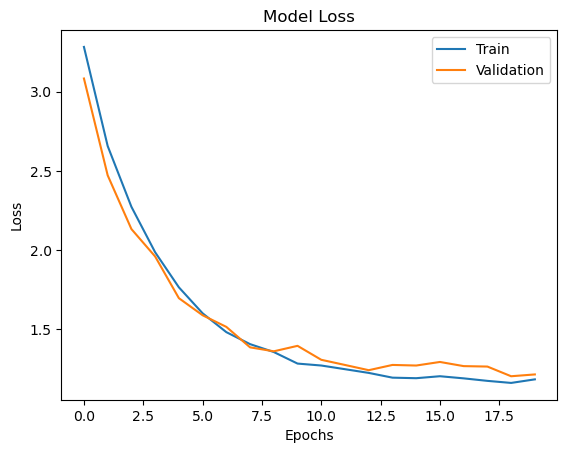

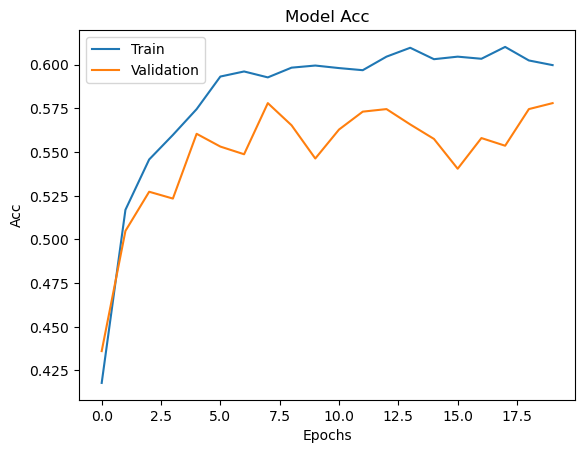

In [36]:
#Plot training and validation loss
plt.plot(inception_history_aug.history['loss'])
plt.plot(inception_history_aug.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='best')
plt.show()

#Plot training and validation accuracy
plt.plot(inception_history_aug.history['acc'])
plt.plot(inception_history_aug.history['val_acc'])
plt.title('Model Acc')
plt.ylabel('Acc')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='best')
plt.show()

In [161]:
###########################Predict Labels for test data#########################

#Labelling test data using custom CNN model (without data augmentation)

#Go through each image in the test data and predict/label it using the model
model_pred = np.array([])
model_prediction = []

vgg_pred = np.array([])
vgg_prediction = []

resnet_pred = np.array([])
resnet_prediction = []

inception_pred = np.array([])
inception_prediction = []

model_aug_pred = np.array([])
model_aug_prediction = []

vgg_aug_pred = np.array([])
vgg_aug_prediction = []

resnet_aug_pred = np.array([])
resnet_aug_prediction = []

inception_aug_pred = np.array([])
inception_aug_prediction = []

for k in test_dataset['id_code']:
    img = image.load_img((test_dir + k), target_size=(128,128))
    img = image.img_to_array(img)
    img = img.reshape(1,128,128,3)
    
    #Perform prediction using each model:
    model_out = model.predict(img)
    model_pred = np.append(model_pred,(np.argmax(model_out[0])))
    
    vgg_out = conv_base_model.predict(img)
    vgg_pred = np.append(vgg_pred,(np.argmax(vgg_out[0])))
    
    resnet_out = resnet_base_model.predict(img)
    resnet_pred = np.append(resnet_pred,(np.argmax(resnet_out[0])))
    
    inception_out = inception_base_model.predict(img)
    inception_pred = np.append(inception_pred,(np.argmax(inception_out[0])))
    
    model_aug_out = model_aug.predict(img)
    model_aug_pred = np.append(model_aug_pred,(np.argmax(model_aug_out[0])))
    
    vgg_aug_out = conv_base_aug_model.predict(img)
    vgg_aug_pred = np.append(vgg_aug_pred,(np.argmax(vgg_aug_out[0])))
    
    resnet_aug_out = resnet_aug_base_model.predict(img)
    resnet_aug_pred = np.append(resnet_aug_pred,(np.argmax(resnet_aug_out[0])))
    
    inception_aug_out = inception_aug_base_model.predict(img)
    inception_aug_pred = np.append(inception_aug_pred,(np.argmax(inception_aug_out[0])))
    
    
for i in model_pred:
    model_prediction.append(int(i))

for i in vgg_pred:
    vgg_prediction.append(int(i))

for i in resnet_pred:
    resnet_prediction.append(int(i))

for i in inception_pred:
    inception_prediction.append(int(i))

for i in model_aug_pred:
    model_aug_prediction.append(int(i))

for i in vgg_aug_pred:
    vgg_aug_prediction.append(int(i))
    
for i in resnet_aug_pred:
    resnet_aug_prediction.append(int(i))

for i in inception_aug_pred:
    inception_aug_prediction.append(int(i))

1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 39ms/step


In [163]:
#Add labelled columns to the test data file
test_dataset['Custom CNN'] = model_prediction
test_dataset['VGG16'] = vgg_prediction
test_dataset['ResNet50'] = resnet_prediction
test_dataset['InceptionV3'] = inception_prediction
test_dataset['Custom CNN (Data Aug)'] = model_aug_prediction
test_dataset['VGG16 (Data Aug)'] = vgg_aug_prediction
test_dataset['ResNet50 (Data Aug)'] = resnet_aug_prediction
test_dataset['InceptionV3 (Data Aug)'] = inception_aug_prediction

test_dataset

,id_code,Custom CNN,VGG16,ResNet50,InceptionV3,Custom CNN (Data Aug),VGG16 (Data Aug),ResNet50 (Data Aug),InceptionV3 (Data Aug)
0,0005cfc8afb6.png,3,2,3,0,0,2,1,0
1,003f0afdcd15.png,3,2,1,0,0,2,0,3
2,006efc72b638.png,3,2,1,0,0,1,0,3
3,00836aaacf06.png,3,2,0,0,0,2,3,0
4,009245722fa4.png,3,2,1,0,0,4,3,0
...,...,...,...,...,...,...,...,...,...
1923,ff2fd94448de.png,3,2,1,0,0,1,3,0
1924,ff4c945d9b17.png,3,2,3,0,0,1,3,0
1925,ff64897ac0d8.png,3,2,0,0,0,1,3,0
1926,ffa73465b705.png,3,4,1,0,0,4,0,0


In [165]:
test_dataset.to_csv('test_labelled.csv')